# [OpenCV-Python Tutorial] Practice Test

In this notebook, you write code to find homography matrix and warp image given SIFT feature matching of two images, and detect faces and eyes from an image.  
Please read the code carefully and fill the blank at the bottom, to produce desired output.

---

# 1. SIFT mosaic

In [1]:
import numpy as np
import cv2 # OpenCV-Python
%matplotlib inline
import matplotlib.pyplot as plt

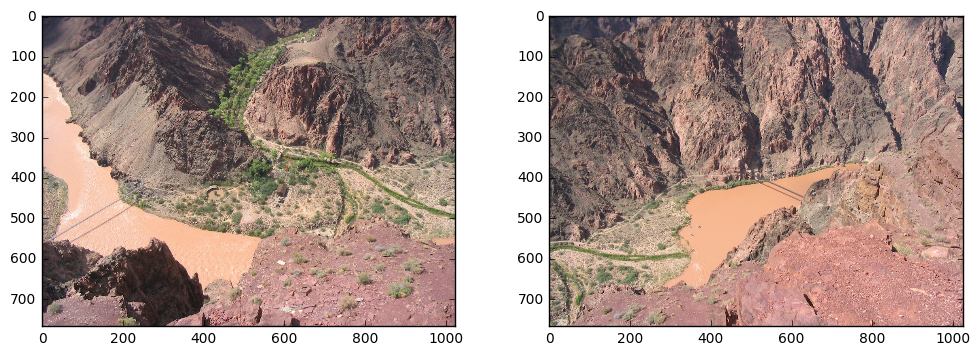

In [2]:
# Open and show images
img1 = cv2.imread('images/river1.jpg')
img2 = cv2.imread('images/river2.jpg')

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [3]:
# SIFT feature extracting
sift = cv2.xfeatures2d.SIFT_create()
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

print('Image 1 - %d feature detected' % des1.shape[0])
print('Image 2 - %d feature detected' % des2.shape[0])

Image 1 - 8861 feature detected
Image 2 - 9345 feature detected


In [4]:
# BFMatcher(Brute Force Matcher) with defalut setting
bf = cv2.BFMatcher(cv2.NORM_L2)
matches = bf.knnMatch(des1, des2, k=2)
print('%d matches' % len(matches))

# Apply ratio test as in David Rowe's paper
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
print('%d matches' % len(good_matches))

8861 matches
1352 matches


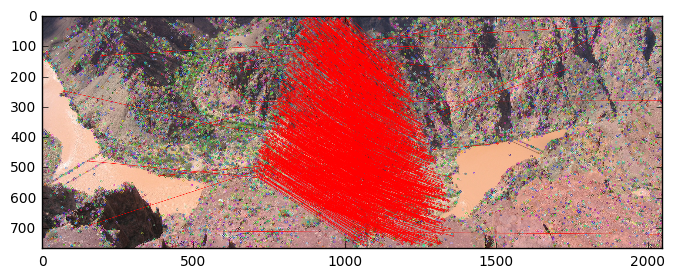

In [5]:
# Display SIFT matches
img3 = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, matchColor = (0,0,255))
plt.figure(figsize=(9,3))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))

In [6]:
trans_x = 0
trans_y = 500
trans = np.float32([[1, 0, trans_x], [0, 1, trans_y], [0, 0, 1]])

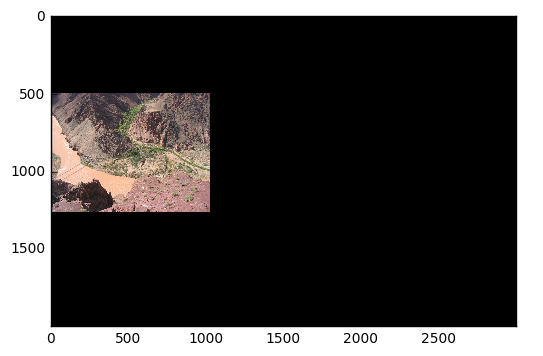

In [7]:
# Output mosaic
out = np.zeros((2000,3000,3),dtype=np.uint8)
out = cv2.warpPerspective(img1, trans, (3000, 2000), out, borderMode=cv2.BORDER_TRANSPARENT)

# Fill code below to find the homography between two images and warp the second image over 'out'
#================ YOUR CODE HERE ===================



#===================================================

plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

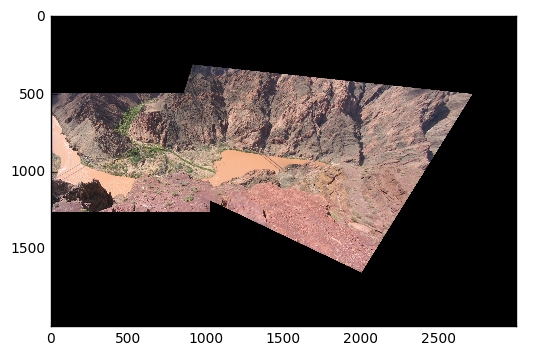

In [8]:
# Desired Output

# 2. Face Detection

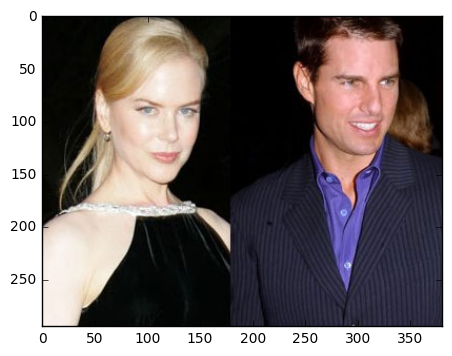

In [9]:
# Detect faces and eyes using these cascade classifiers
face_cascade = cv2.CascadeClassifier('detect/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('detect/haarcascade_eye.xml')

img = cv2.imread('images/kidman-cruise.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
img = cv2.imread('images/kidman-cruise.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#================ YOUR CODE HERE ===================
# Please tune 'scaleFactor' argument to detect all faces and eyes

# faces = face_cascade ...
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
#     eyes = eye_cascade ...
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
#===================================================
        
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

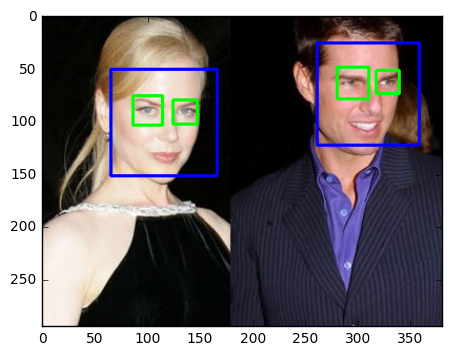

In [11]:
# Desired Output